<div style="text-align: right"><b>31th, October 2022</b></div>

# Data Scientist Udacity Nanodegree - Capstone Project: Starbucks Capstone Challenge


#### Author: Sebastian Heß


<img src="pics/pic_sb.jpg"/>

<a id='top'></a>
## Table of Contents
<ol class="level_1">
    <li><a href="#int">Introduction</a></li>
        <ol class="level_2">
            <li><a href="#int_1">Project Information by Udacity</a></li>
        </ol>
     <li><a href="#sec1">Section 1: Project Definition</a></li>
        <ol class="level_2">
            <li><a href="#sec1_1">Project Overview</a></li>
            <li><a href="#sec1_2">Project Statement</a></li>
            <li><a href="#sec1_3">Metrics</a></li>
        </ol>   
    <li><a href="#sec2">Section 2: Exploratory Data Analysis</a></li>
        <ol class="level_2">
            <li><a href="#sec2_1">Data Exploration</a></li>
            <ol class="level_3">
                <li><a href="#sec2_11">Data Wrangling</a></li> 
                <ol class="level_4">
                <li><a href="#sec2_111">Portfolio (offer)</a></li>
                <li><a href="#sec2_112">Profile (demographic)</a></li>
                <li><a href="#sec2_113">Transcript (transaction records)</a></li>
                <li><a href="#sec2_114">Merge of the Data Frames</a></li>
            </ol>
            </ol>
            <li><a href="#sec2_2">Data Visualization</a></li>
        </ol>
    <li><a href="#sec3">Section 3: Methodology</a></li>
        <ol class="level_2">
            <li><a href="#sec3_1">Data Preprocessing</a></li>
            <li><a href="#sec3_2">Implementation</a></li>
            <li><a href="#sec3_2">Refinement</a></li>
        </ol>
    <li><a href="#sec4">Section 4: Results</a></li>
        <ol class="level_2">
            <li><a href="#sec4_1">Model Evaluation and Validation</a></li>
            <li><a href="#sec4_2">Justification</a></li>
        </ol>
    <li><a href="#sec5">Section 5: Conclusion</a></li>
        <ol class="level_2">
            <li><a href="#sec5_1">Reflection</a></li>
            <li><a href="#sec5_2">Improvement</a></li>
        </ol>
    <li><a href="#sec6">References</a></li>
</ol>

<a id='int'></a>
## 1. Introduction
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<a id='int_1'></a>
### 1. A. Project Information provided by Udacity
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* **portfolio.json** - containing offer ids and meta data about each offer (duration, type, etc.)
* **profile.json** - demographic data for each customer
* **transcript.json** - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pics/pic1.png"/>

Then you will want to run the above command:

<img src="pics/pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

<a id='sec1'></a>
## 2. Section 1: Project Definition
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<a id='sec1_1'></a>
### 2. A. Project Overview
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<span style="color:red">state the high-level overview of the project, including the background information such as problem domain, project origin, and related data sets or input data.</span>


This is the final project of my Udacity Data Scientist Nanodegree. I chose the Starbuck's Capstone Challenge project because I'm interested in the experience of studying user demographic purchasing behavior across different offer types to determine which demographics respond best to which offer type.

The data consists of simulated data that mimics customer behavior in the Starbucks Rewards mobile app. Starbuck regularly sends customers offers through the mobile app. The offers contain either advertising or various discount options.

Identifying the top responding demographics by offer type requires combining transactional, demographic, and offer data.

<a id='sec1_2'></a>
### 2. B. Problem Statement
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<span style="color:red">define the problem to be solved.</span>


For this project Starbucks and Udacity are providing 3 data sets:

1. **Protfolio (offer)** - Containing offer ids and meta data about each offer sent during a 30-day test period (duration, type, etc.)
2. **Profile (demographic)** - Containing demographic data of the rewards program for each customer.
3. **Transcript (transaction records)** - Containing event logs like records for transactions, offers received, offers viewed, and offers completed.


##### **Facts:**
* The users might not receive any offer in a specific time range.
* The users are receiving different kinds of offers.


##### **Tasks:**

1. Exploring the data by wrangling.
2. Data Analyse by Visualization of the data.
3. Preprocessing the data.
4. Implementation of the maschine learning model.
5. Refinement of the maschine learning model.
6. Evaluation of the maschine learning model and justification of the results.
7. Reflection about the solution and protential improvements.

##### **Challenges:**

1. C1: My main objective is to implement a logic that makes it possible to predict the demographic of customers who will buy without being influenced by an offer.

<span style="color:red">2. C2: My main objective is to implement a logic that predicts the amount of money a customer spends based on demographics and offer type</span>

<span style="color:red">3. C3: My main objective is to implement a logic that predicts if a customer will respond to an offer.</span>

<span style="color:red">4. C4: My main objective is to implement set of heuristics to determine to offer which should be send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).
</span>

<a id='sec1_3'></a>
### 2. C. Metrics
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<span style="color:red">define the metrics to measure the results and justifications to use the metrics. For example, if you use time-series data sets, what metrics will be appropriate to measure the results.</span>


<a id='sec2'></a>
## 3. Section 2: Exploratory Data Analysis
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<a id='sec2_1'></a>
### 3. A. Data Exploration
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

#### Description of the data sets, including the features, data distributions, and descriptive statistics. Identification of any abnormalities or specific characteristics inherent in the data sets.<br>

### Imported Libraries and Modules

> **OS** a python module which priveds functions for interacting with the operating system OS.

> **Numpy** a Python library for working with arrays.

> **Pandas** a Python library for data manipulating and analysis.
    
> **import math** math module has a set of methods and constants.

> **import json** to work with JSON data.

> **Matplotlib** a Python library for data visualizations.

> **%matplotlib inline** a magic function for inline plotting of graphs.

> **Seaborn** a Python library for data visuallization based on matplotlib.

> **sns.set_style** to define the seaborn figure aesthetic as "darkgrid".
    


In [312]:
# Importing Libraries
import os as os
import numpy as np
import pandas as pd
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

import itertools


<a id='sec2_11'></a>
### 3. A. a. Data Wrangling
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>


In [313]:
# Reading in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)


<a id='sec2_111'></a>
### Portfolio (offer) - General Properties of Fata Frame
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

#### Information: Offers sent during 30-day test period (10 offers x 6 fields)

>* reward: (numeric) money awarded for the amount spent
>* channels: (list) web, email, mobile, social
>* difficulty: (numeric) money required to be spent to receive reward
>* duration: (numeric) time for offer to be open, in days
>* offer_type: (string) bogo, discount, informational
>* id: (string/hash)<br>


In [314]:
# Checking the shape of the data frame
portfolio.shape


(10, 6)

**Conclusion:** The data frame consits of *6* columns and *10* rows.

In [315]:
# Displaying data frame to get an idea of the data
portfolio.head()


,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


**Conclusion:** 
1. Since the variable "offer_type" is relevant for this analysis its values will be investigated more detailed. 
2. The variable "id" represents the **offer id**. 
3. The variable "channels" will be split in categorical variables based on its values.

In [316]:
# Checking a concise summary of the dataframe
portfolio.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 6 columns):
channels      10 non-null object
difficulty    10 non-null int64
duration      10 non-null int64
id            10 non-null object
offer_type    10 non-null object
reward        10 non-null int64
dtypes: int64(3), object(3)
memory usage: 560.0+ bytes


In [317]:
# Checking the dtype of the dataframe
portfolio.dtypes


channels      object
difficulty     int64
duration       int64
id            object
offer_type    object
reward         int64
dtype: object

**Conclusion:** The data frame contains two different data types `object` and `int64`. 

In [318]:
# Checking the number of missing values
portfolio.isnull().sum()


channels      0
difficulty    0
duration      0
id            0
offer_type    0
reward        0
dtype: int64

**Conclusion:** The data frame does not contain any NaN values.

In [319]:
# Checking for duplicate values
portfolio.columns.duplicated().sum()


0

**Conclusion:** The data frame does not contain any duplicated values.

In [320]:
# Checking the unique values of the data frame based in 'id'
portfolio.groupby('id').nunique().count()


channels      10
difficulty    10
duration      10
id            10
offer_type    10
reward        10
dtype: int64

**Conclusion:** The data frame, grouped by the variable 'id' contains only unique values.

In [321]:
# Checking and counting the "offer_type" values 
portfolio.groupby('offer_type')['id'].count()


offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

**Conclusion:** The variable "offer_type" contains 3 values: 
* `bogo` with a count of *4*,
> Meaning: Buy one get one free.
* `discount` also with a count of *4* and
> Meaning: Regular discount for an order. 
* `informational` with a count of *2*.
> Meaning: Special offers.

### Portfolio (offer) - Cleaning

**Tasks:**
1. Renaming the variable "id"in "offer_id".
2. Splitting the variable "channels" in categorical variables based on its values.


In [322]:
# Copying the data frame
portfolio_clean = portfolio.copy()


**Result:** The data frame is copied.

### Renaming the variable "id"in "offer_id".

#### Code

In [323]:
# Renaming the column "id"
portfolio_clean.rename(columns={'id':'offer_id'},inplace=True)


#### Test

In [324]:
# # Displaying the new data frame to check the changes
portfolio_clean.head()


,channels,difficulty,duration,offer_id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5


**Result:** The column "id" is renamed in "offer_id".

### Splitting the variable "channels" in categorical variables based on its values.

#### Code

In [325]:
# Function: Defining function to create a list of the column names of the categorical variables.
# (Source of code parts: Udacity - Data Scientist Nanodegree Program)
def f_create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - Pandas data frame with categorical variables to create dummies.
    cat_cols - List of names (strings) of the categorical columns.
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - New dataframe of the following characteristics:
            1. Contains all not categorical columns.
            2. Removes the original columns in cat_cols (all).
            3. Dummy each categorical columns in cat_cols.
            4. dummy_na == TRUE - It does contain dummy columns for NaN values.
            5. Prefix of the column name: Underscore (_) for separating. 
            
    Description:
    Splits values of an variable into categorical variables.
    '''
    for col in  cat_cols:
        try:
            #for each cat add dummy var, drop original column
            df = pd.concat([df.drop(cat_cols, axis=1), 
                            pd.get_dummies(df[cat_cols].apply(pd.Series).stack(), prefix=cat_cols, 
                            prefix_sep='_', drop_first=False, dummy_na=dummy_na).sum(level=0).astype('int')], 
                           axis=1)
        except:   
            continue
            
    df.columns = df.columns.str.replace(' ','_')
     
    return df


**Result:** A function is created to split values of an variable into categorical variables.

In [326]:
# Using the function: f_create_dummy_df
portfolio_clean = f_create_dummy_df(portfolio_clean, 'channels', dummy_na=False)


#### Test

In [327]:
# Checking a concise summary of the dataframe
portfolio_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 9 columns):
difficulty         10 non-null int64
duration           10 non-null int64
offer_id           10 non-null object
offer_type         10 non-null object
reward             10 non-null int64
channels_email     10 non-null int64
channels_mobile    10 non-null int64
channels_social    10 non-null int64
channels_web       10 non-null int64
dtypes: int64(7), object(2)
memory usage: 1.1+ KB


In [328]:
# Displaying the new data frame to check the changes
portfolio_clean.head()


,difficulty,duration,offer_id,offer_type,reward,channels_email,channels_mobile,channels_social,channels_web
0,10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0
1,10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1,1,1,1
2,0,4,3f207df678b143eea3cee63160fa8bed,informational,0,1,1,0,1
3,5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,1,1,0,1
4,20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,1,0,0,1


**Result:** The variable "channels" is split in categorical variables based on its values.

In [329]:
# Checking the shape of the data frame
portfolio_clean.shape


(10, 9)

**Conclusion:** The data frame consits of *9* columns and *10* rows.

<a id='sec2_112'></a>
### Profile (demographic) - General Properties of Fata Frame
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

#### Information: Rewards program users (17000 users x 5 fields)

>* gender: (categorical) M, F, O, or null
>* age: (numeric) missing value encoded as 118
>* id: (string/hash)
>* became_member_on: (date) format YYYYMMDD
>* income: (numeric)


In [330]:
# Checking the shape of the data frame
profile.shape


(17000, 5)

**Conclusion:** The data frame consits of *5* columns and *17,000* rows.

In [331]:
# Displaying data frame to get an idea of the data
profile.head()


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


**Conclusion:**
1. The following variables values will be investigated more detailed since they are relevant for this analysis:
 * "gender"
    * "None" values 
 * "income"
    * "NaN" values   
2. The variable "age" contains values which are unrealistically high.
 *  `profile['age'][0]` &rarr; value = *118*
3. There is also a correlation between the three variables:

index  | gender | income | age
:----: | :----: | :----: | :----:
0      | None   | NaN    | 118
2      | None   | NaN    | 118
4      | None   | NaN    | 118
...    | ...    | ...    | ... 

4. The variable "id" represents the **customer id**.


In [332]:
# Checking a concise summary of the dataframe
profile.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17000 entries, 0 to 16999
Data columns (total 5 columns):
age                 17000 non-null int64
became_member_on    17000 non-null int64
gender              14825 non-null object
id                  17000 non-null object
income              14825 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 796.9+ KB


In [333]:
# Checking the dtype of the dataframe
profile.dtypes


age                   int64
became_member_on      int64
gender               object
id                   object
income              float64
dtype: object

**Conclusion:** 
1. The data frame contains three different data types:
 * `object`
 * `int64`
 * `float64`
2. The variable "became_member_on" should be converted into a date format. <br>
It is also possible that there is a correlation with the offers, which can be investigated.

In [334]:
# Checking the number of missing values
profile.isnull().sum()


age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

**Conclusion:** 
1. The following variables of the data frame are containing NaN values:
 * "gender"
 * "income" 
2. The amount of NaN values of both variables is equal. The sum is *2175*.

In [335]:
# Checking for duplicate values
profile.columns.duplicated().sum()


0

**Conclusion:** The data frame does not contain any duplicated values.

In [336]:
# Showing the unique values of the data frame
profile.groupby('id').nunique().count()


age                 17000
became_member_on    17000
gender              17000
id                  17000
income              17000
dtype: int64

**Conclusion:** The data frame, grouped by the variable 'id' contains only unique values.

In [337]:
# Checking and counting the "age" values 
df_118 = profile[profile['age'] == 118]
df_118.head()


,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN
6,118,20170925,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN
7,118,20171002,None,68617ca6246f4fbc85e91a2a49552598,NaN


In [338]:
# Checking if there are any "F", "M" or "O" values in the variable "gender" 
# while filtering varibale "age" equal to the value 118
df_118_F = df_118[df_118['gender'] == 'F']['gender'].count()
df_118_M = df_118[df_118['gender'] == 'M']['gender'].count()
df_118_O = df_118[df_118['gender'] == 'O']['gender'].count()
df_118_NaN = pd.isna(df_118["gender"]).count()

print('Count of value "F" = {}'.format(df_118_F))
print('Count of value "M" = {}'.format(df_118_M))
print('Count of value "O" = {}'.format(df_118_O))
print('Count of value "NaN" = {}'.format(df_118_NaN))


Count of value "F" = 0
Count of value "M" = 0
Count of value "O" = 0
Count of value "NaN" = 2175


**Conclusion:** 

1. The variable "age" filtered by the value of *118* shows that the variable "gender" does not include other values except of the "NaN" values.
2. The amount of "NaN" values *2175* is equal to the amount of "NaN" values of the variable "gender" and "income" within the "profile" data frame.


In [339]:
# Calculating the descriptive statistics of the "age" values grouped by the variable "gender"
# (50 % is equal to the median)
profile.groupby('gender')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,6129.0,57.544950,16.883315,18.0,48.0,58.0,69.0,101.0
M,8484.0,52.116690,17.413894,18.0,39.0,53.0,65.0,100.0
O,212.0,54.400943,16.244710,20.0,43.0,55.0,66.0,100.0


In [340]:
# Checking and counting the missing values of varibale "gender" 
profile['gender'].isnull().sum()


2175

**Conclusion:** 

1. The variable "gender" contains the following values and counts of values:
 * "F" &rarr; count = *6129*
 * "M" &rarr; count = *8484*
 * "O" &rarr; count = *212*
 * "None" &rarr; count = *2175*


2. The max value of the descriptive statistics displays that the highest age value of the "gender" values "F", "M" and "O" is below *118*.
 * "F" &rarr; value = *101.0*
 * "M" &rarr; value = *100.0*
 * "O" &rarr; value = *100.0*

### Profile (demographic) - Cleaning

**Tasks:**
1. Renaming the variable "id"in "customer_id".
2. Converting the variable "became_member_on" into a date format.

In [341]:
# Copying the data frame
profile_clean = profile.copy()


**Result:** The data frame is copied.

### Renaming the variable "id"in "customer_id".

#### Code

In [342]:
# Renaming the column "id"
profile_clean.rename(columns={'id':'customer_id'},inplace=True)


#### Test

In [343]:
# Displaying the new data frame to check the changes
profile_clean.head()


,age,became_member_on,gender,customer_id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,20180712,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,20170509,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,20170804,None,a03223e636434f42ac4c3df47e8bac43,NaN


**Result:** The column "id" is renamed in "customer_id".

### Converting the variable "became_member_on" into a date format.

#### Code

In [344]:
# Converting the dtype of the column.
profile_clean['became_member_on'] = pd.to_datetime(profile_clean['became_member_on'], format='%Y%m%d')


**Result:** The data frame is copied.

#### Test

In [345]:
# Displaying the new data frame to check the changes
profile_clean.head()


,age,became_member_on,gender,customer_id,income
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN


**Result:** The variable "became_member_on" is converted into a date format.

In [346]:
# Checking the shape of the data frame
profile_clean.shape


(17000, 5)

**Result:** The data frame consits of *5* columns and *17,000* rows.

<a id='sec2_113'></a>
### Transcript (transaction records) - General Properties of Fata Frame
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

#### Information: Event log (306648 events x 4 fields)

>* person: (string/hash)
>* event: (string) offer received, offer viewed, transaction, offer completed
>* value: (dictionary) different values depending on event type
>* offer id: (string/hash) not associated with any "transaction"
>* amount: (numeric) money spent in "transaction"
>* reward: (numeric) money gained from "offer completed"
>* time: (numeric) hours after start of test


In [347]:
# Checking the shape of the data frame
transcript.shape


(306534, 4)

**Conclusion:** The data frame consits of *4* columns and *306,534* rows.

In [348]:
# Displaying data frame to get an idea of the data
transcript.head()


,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


**Conclusion:**
1. The following variables values will be investigated more detailed since they are relevant for this analysis:
 * "time"
    * "0" values 
 * "event"
    * `string` values 
2. The variable "person" represents the **customer id**. 
3. The variable "value" includes a dictionary with the 
 * key &rarr; **offer id**
 * value &rarr; **value of offer id**<br>
 
Because it is possible that there are more keys existing, this variable will be checked in detail.

4. Based on the included **offer id** and **value of offer id** this data frame can be used to merge the previous two data frames.
5. The variable "value" should be converted into a column which only contains the **offer id**.


In [349]:
# Checking a concise summary of the dataframe
transcript.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 4 columns):
event     306534 non-null object
person    306534 non-null object
time      306534 non-null int64
value     306534 non-null object
dtypes: int64(1), object(3)
memory usage: 11.7+ MB


In [350]:
# Checking the dtype of the dataframe
transcript.dtypes


event     object
person    object
time       int64
value     object
dtype: object

**Conclusion:** 
1. The data frame contains three different data types:
 * `object`
 * `int64`


In [351]:
# Checking the number of missing values
transcript.isnull().sum()


event     0
person    0
time      0
value     0
dtype: int64

**Conclusion:** 
The data frame does not contain any NaN values.

In [352]:
# Checking for duplicate values
transcript.columns.duplicated().sum()


0

**Conclusion:** The data frame does not contain any duplicated values.

In [353]:
# Showing the unique values of the data frame
#transcript.groupby('person').nunique().count()
transcript['person'].nunique()


17000

**Conclusion:** The data frame variable 'person' (customer id) contains only *17,000* unique values. That is few compared to the total quantity of *306,534*. But it is the same amount of customer id´s as in the data frame "profile".

In [354]:
# Checking and counting the amount of "person" values when "time" = 0
df_0_time  = transcript[transcript['time'] == 0]['person'].count()
print('Count of "person" values when "time" = 0: {}'.format(df_0_time))


Count of "person" values when "time" = 0: 15561


**Conclusion:** The data frame, filtered by the variable 'time' = 0 contains 15,561 "person" values.

In [355]:
# Checking the unique values of the variable "event"
list_event = transcript['event'].unique().tolist()


**Conclusion:** The data frame variable "event" contains the following values:
 * *'offer received'*
 * *'offer viewed'*
 * *'transaction'*
 * *'offer completed'*
 

In [356]:
# Checking the keys and values of the variable "value" in a sample.
list_value = transcript['value']
list_value.sample(9)


289308                                     {'amount': 9.09}
154915     {'offer id': '5a8bc65990b245e5a138643cd4eb9837'}
281376     {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
204032     {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}
7796       {'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
241619                                     {'amount': 2.87}
100942                                    {'amount': 31.97}
88985                                      {'amount': 2.87}
74486     {'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...
Name: value, dtype: object

In [357]:
# Function: Defining function to create a list of keys existig in a dictionary in a variable (column).
def f_create_key_list(df, col_name):
    '''
    INPUT:
    df - Pandas data frame with dictionary to create new columns.
    col_name - Dictionary of keys (strings).
    
    OUTPUT:
    dict_keys - New list of the following characteristics:
            1. Contains all keys of an dictionary in a list. 
    Description:
    Creates a list of keys existig in a dictionary in a variable (column).
    '''
    dict_keys = []
    for index, row in df.iterrows():
        for key in row[col_name]:
            if key in dict_keys:
                continue
            else:
                dict_keys.append(key)
  
    return dict_keys


**Result:** A function is created to create a list of keys existig in a dictionary in a variable (column).

In [358]:
# Using the function: f_create_dict_df
f_create_key_list(transcript, 'value')


['offer id', 'amount', 'offer_id', 'reward']

**Conclusion:** The variable "value" cointains more then one key and different values:
 * key &rarr; 'offer id'
 * key &rarr; 'offer_id'
 * key &rarr; 'amount'
 * key &rarr; 'reward'

### Transcript (transaction records) - Cleaning

**Tasks:**
1. Renaming the variable "person"in "customer_id".
2. Splitting the variable "event" in categorical variables based on its values.
3. Converting the variable "value" into one column each key.
4. Combining the 2 offer id variables including their values in 1 variable "offer_id".

In [359]:
# Copying the data frame
transcript_clean = transcript.copy()


**Result:** The data frame is copied.

### Renaming the variable "person"in "customer_id".

#### Code

In [360]:
# Renaming the column "id"
transcript_clean.rename(columns={'person':'customer_id'},inplace=True)


#### Test

In [361]:
# Displaying the new data frame to check the changes
transcript_clean.head()


,event,customer_id,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2,offer received,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'}
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}
4,offer received,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}


**Result:** The column "person" is renamed in "customer_id".

### Splitting the variable "event" in categorical variables based on its values.

#### Code

In [362]:
# Using the function: f_create_dummy_df
transcript_clean = f_create_dummy_df(transcript_clean, 'event', dummy_na=False)


In [363]:
# Checking a concise summary of the dataframe
transcript_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 7 columns):
customer_id              306534 non-null object
time                     306534 non-null int64
value                    306534 non-null object
event_offer_completed    306534 non-null int64
event_offer_received     306534 non-null int64
event_offer_viewed       306534 non-null int64
event_transaction        306534 non-null int64
dtypes: int64(5), object(2)
memory usage: 28.7+ MB


#### Test

In [364]:
# Displaying the new data frame to check the changes
transcript_clean.head()


,customer_id,time,value,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction
0,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,1,0,0
1,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,1,0,0
2,e2127556f4f64592b11af22de27a7932,0,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,1,0,0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,1,0,0
4,68617ca6246f4fbc85e91a2a49552598,0,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,1,0,0


**Result:** The variable "event" is split in categorical variables based on its values.

### Converting the variable "value" into one column each key.

#### Code

In [365]:
# Function: Defining function to create the columns for each of the dictionary keys.
def f_create_dict_df(df, col_name):
    '''
    INPUT:
    df - Pandas data frame with dictionary to create new columns.
    col_name - Dictionary of keys (strings).
    
    OUTPUT:
    df - New dataframe of the following characteristics:
            1. Contains all keys as columns.
            2. Removes the original columns in cat_cols (all).
            3. Create column for each key in cat_cols dictionary.
            4. Prefix of the column name: Underscore (_) for separating. 
    Description:
    Converts the dictionary keys of an variable into separate columns.
    '''
    df= pd.concat([df.drop(col_name, axis=1), df[col_name].apply(pd.Series).add_prefix('_').add_prefix(col_name)],
                  axis=1)
  
    return df


**Result:** A function is created to convert the dictionary keys of an variable into separate columns.

In [366]:
# Using the function: f_create_dict_df
transcript_clean = f_create_dict_df(transcript_clean, 'value')


**Result:** The function is used on this data frame.

#### Test

In [367]:
# Displaying the new data frame to check the changes
transcript_clean.head()


,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,value_amount,value_offer id,value_offer_id,value_reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,NaN
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,NaN


In [368]:
# Checking a concise summary of the dataframe
transcript_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 10 columns):
customer_id              306534 non-null object
time                     306534 non-null int64
event_offer_completed    306534 non-null int64
event_offer_received     306534 non-null int64
event_offer_viewed       306534 non-null int64
event_transaction        306534 non-null int64
value_amount             138953 non-null float64
value_offer id           134002 non-null object
value_offer_id           33579 non-null object
value_reward             33579 non-null float64
dtypes: float64(2), int64(5), object(3)
memory usage: 35.7+ MB


**Result:** After processing the function there are 2 variables (dictionary keys of column "value") existing in the data frame which will be combined in the next step:
 * "value_offer id"
 * "value_offer_id"
 

### Combining the 2 offer id variables including their values in 1 variable "offer_id".

#### Code

In [369]:
# Function: Defining function to combine 2 variables in one column.
def f_create_var_2to1_df(df, col_new, col_name1, col_name2):
    '''
    INPUT:
    df - Pandas data frame including the necessary columns.
    col_name1 - First variable name.
    col_name2 - Second variable name.
    col_new - New variable name (combined column)
    
    OUTPUT:
    df - New dataframe of the following characteristics:
            1. Checks if col_new (string) is already existing in col_name1 and col_name2
            2. Combines 2 variables into 1 variable.
            3. Removes the original columns in cat_name1 and cat_name2 (all).
    Description:
    Combines 2 variables in one column.
    '''
    # Checking if col_new (string) is already existing in col_name1 and col_name2
    if col_new == col_name1:
        df.rename(columns={col_name1:col_new + '_1'},inplace=True) # Renaming the identical variable name
        col_name1 = col_new + '_1'
        pass
    elif col_new == col_name2:
        df.rename(columns={col_name2:col_new + '_2'},inplace=True) # Renaming the identical variable name
        col_name2 = col_new + '_2'
        pass
    else:
        pass
        
    # Combining the 2 variables into 1 varible
    df[col_new] = np.where(df[col_name1].isnull() & df[col_name2].notnull(), df[col_name2],df[col_name1])
    
    # Dropping not needed columns.
    df = df.drop([col_name1, col_name2], axis=1)
    
    return df


**Result:** A function is created to combine 2 variables in one column.

In [370]:
# Using the function: f_create_var_2to1_df
transcript_clean = f_create_var_2to1_df(transcript_clean, 'offer_id', 'value_offer id', 'value_offer_id')


**Result:** The function is used on this data frame.

#### Test

In [371]:
# Displaying the new data frame to check the changes
transcript_clean.head()


,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,value_amount,value_reward,offer_id
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0


**Result:** 
* The keys of the variable "value" are converted into separate columns.
* The 2 offer id variables including their values are combined into 1 variable "offer_id".

In [372]:
# Checking a concise summary of the dataframe
transcript_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 9 columns):
customer_id              306534 non-null object
time                     306534 non-null int64
event_offer_completed    306534 non-null int64
event_offer_received     306534 non-null int64
event_offer_viewed       306534 non-null int64
event_transaction        306534 non-null int64
value_amount             138953 non-null float64
value_reward             33579 non-null float64
offer_id                 167581 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 33.4+ MB


**Result:** 
1. The new variable "offer_id" contains all values from the previous 2 offer id variables.
2. The variables "value_amount" and "value_reward"are containing a lot of NaN values.

In [373]:
# Checking the shape of the data frame
transcript_clean.shape


(306534, 9)

**Result:** The data frame consits of *9* columns and *306,534* rows.

<a id='sec2_114'></a>
### Merge of the Data Frames
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

### Merge of "transcript_clean" and "portfolio_clean"

In [374]:
# Checking the shape of the data frame
transcript_clean.shape


(306534, 9)

In [375]:
# Checking the shape of the data frame
portfolio_clean.shape


(10, 9)

In [376]:
# Merging the data frame "transcript_clean" with the data frame "portfolio_clean"
df_merge1 = transcript_clean.merge(portfolio_clean, on='offer_id', how='left')
df_merge1.head()


,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,value_amount,value_reward,offer_id,difficulty,duration,offer_type,reward,channels_email,channels_mobile,channels_social,channels_web
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,10.0,discount,5.0,1.0,0.0,0.0,1.0
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,NaN,2906b810c7d4411798c6938adc9daaa5,10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0


In [377]:
# Checking the shape of the data frame
df_merge1.shape


(306534, 17)

In [378]:
# Checking a concise summary of the dataframe 
df_merge1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 17 columns):
customer_id              306534 non-null object
time                     306534 non-null int64
event_offer_completed    306534 non-null int64
event_offer_received     306534 non-null int64
event_offer_viewed       306534 non-null int64
event_transaction        306534 non-null int64
value_amount             138953 non-null float64
value_reward             33579 non-null float64
offer_id                 167581 non-null object
difficulty               167581 non-null float64
duration                 167581 non-null float64
offer_type               167581 non-null object
reward                   167581 non-null float64
channels_email           167581 non-null float64
channels_mobile          167581 non-null float64
channels_social          167581 non-null float64
channels_web             167581 non-null float64
dtypes: float64(9), int64(5), object(3)
memory usage: 42.1+ MB


In [379]:
# Checking the values of the variables "value_reward" and "reward".
df_merge1[['value_reward', 'reward']].sample(9)


,value_reward,reward
175051,NaN,NaN
111663,NaN,5.0
195184,NaN,NaN
147593,NaN,NaN
28180,NaN,NaN
101399,NaN,NaN
73708,NaN,NaN
220533,NaN,NaN
103930,NaN,NaN


**Conclusion:** After the merge of the 2 data frames there are 2 variables (columns) which are probaply identical and should be combined into 1 variable:
* "value_reward"
* "reward"

### Merge of the Data Frames - Cleaning

**Tasks:**
1. Combining the 2 reward variables including their values in 1 variable "reward".

In [380]:
# Copying the data frame
df_merge1_clean = df_merge1.copy()


**Result:** The data frame is copied.

### Combining the 2 reward variables including their values in 1 variable "reward".

#### Code

In [381]:
# Checking a concise summary of the dataframe
df_merge1_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 17 columns):
customer_id              306534 non-null object
time                     306534 non-null int64
event_offer_completed    306534 non-null int64
event_offer_received     306534 non-null int64
event_offer_viewed       306534 non-null int64
event_transaction        306534 non-null int64
value_amount             138953 non-null float64
value_reward             33579 non-null float64
offer_id                 167581 non-null object
difficulty               167581 non-null float64
duration                 167581 non-null float64
offer_type               167581 non-null object
reward                   167581 non-null float64
channels_email           167581 non-null float64
channels_mobile          167581 non-null float64
channels_social          167581 non-null float64
channels_web             167581 non-null float64
dtypes: float64(9), int64(5), object(3)
memory usage: 42.1+ MB


In [382]:
# Checking the values of the variables "value_reward" and "reward".
df_merge1_clean[['value_reward', 'reward']].sample(9)


,value_reward,reward
129215,NaN,0.0
159697,NaN,5.0
111847,NaN,0.0
190170,NaN,NaN
222858,NaN,0.0
198680,NaN,NaN
105371,NaN,NaN
46628,NaN,NaN
305191,NaN,NaN


In [383]:
# Dropping NaN values from the variable "value_reward"
df_reward = df_merge1_clean.dropna(subset=['value_reward'])
df_reward.head()


,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,value_amount,value_reward,offer_id,difficulty,duration,offer_type,reward,channels_email,channels_mobile,channels_social,channels_web
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,0,1,0,0,0,NaN,2.0,2906b810c7d4411798c6938adc9daaa5,10.0,7.0,discount,2.0,1.0,1.0,0.0,1.0
12672,fe97aa22dd3e48c8b143116a8403dd52,0,1,0,0,0,NaN,2.0,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,discount,2.0,1.0,1.0,1.0,1.0
12679,629fc02d56414d91bca360decdfa9288,0,1,0,0,0,NaN,5.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0
12692,676506bad68e4161b9bbaffeb039626b,0,1,0,0,0,NaN,10.0,ae264e3637204a6fb9bb56bc8210ddfd,10.0,7.0,bogo,10.0,1.0,1.0,1.0,0.0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,0,1,0,0,0,NaN,10.0,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,5.0,bogo,10.0,1.0,1.0,1.0,1.0


In [384]:
# Checking a concise summary of the dataframe
df_reward.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 33579 entries, 12658 to 306527
Data columns (total 17 columns):
customer_id              33579 non-null object
time                     33579 non-null int64
event_offer_completed    33579 non-null int64
event_offer_received     33579 non-null int64
event_offer_viewed       33579 non-null int64
event_transaction        33579 non-null int64
value_amount             0 non-null float64
value_reward             33579 non-null float64
offer_id                 33579 non-null object
difficulty               33579 non-null float64
duration                 33579 non-null float64
offer_type               33579 non-null object
reward                   33579 non-null float64
channels_email           33579 non-null float64
channels_mobile          33579 non-null float64
channels_social          33579 non-null float64
channels_web             33579 non-null float64
dtypes: float64(9), int64(5), object(3)
memory usage: 4.6+ MB


In [385]:
# Checking existance of NaN values in data frame
df_reward['value_reward'].isnull().any()


False

In [386]:
# Checking existance of NaN values in data frame
df_reward['reward'].isnull().any()


False

In [387]:
# Comparing if the variables "value_reward" and "reward" are identical
df_reward = pd.DataFrame(df_reward)

df_reward1 = df_reward['reward']
df_reward2 = df_reward['value_reward']

print((df_reward1 == df_reward2).all())


True


**Result:** Each value of the variable "value_reward" has an identical value in variable "reward". The variables can be combined into one variable without loosing any data.

In [388]:
# Using the function: f_create_var_2to1_df
df_merge1_clean = f_create_var_2to1_df(df_merge1_clean, 'reward', 'value_reward', 'reward')


**Result:** The function is used on this data frame.

#### Test

In [389]:
# Checking a concise summary of the dataframe
df_merge1_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 16 columns):
customer_id              306534 non-null object
time                     306534 non-null int64
event_offer_completed    306534 non-null int64
event_offer_received     306534 non-null int64
event_offer_viewed       306534 non-null int64
event_transaction        306534 non-null int64
value_amount             138953 non-null float64
offer_id                 167581 non-null object
difficulty               167581 non-null float64
duration                 167581 non-null float64
offer_type               167581 non-null object
channels_email           167581 non-null float64
channels_mobile          167581 non-null float64
channels_social          167581 non-null float64
channels_web             167581 non-null float64
reward                   167581 non-null float64
dtypes: float64(8), int64(5), object(3)
memory usage: 39.8+ MB


In [390]:
# Displaying the new data frame to check the changes
df_merge1_clean.head()


,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,value_amount,offer_id,difficulty,duration,offer_type,channels_email,channels_mobile,channels_social,channels_web,reward
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,7.0,bogo,1.0,1.0,0.0,1.0,5.0
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,10.0,discount,1.0,0.0,0.0,1.0,5.0
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,10.0,7.0,discount,1.0,1.0,0.0,1.0,2.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,discount,1.0,1.0,1.0,1.0,2.0
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,10.0


In [391]:
# Checking the shape of the data frame
df_merge1_clean.shape


(306534, 16)

**Result:** The new variable "reward" contains all values from the previous 2 offer id variables.

### Merge of "df_merge_clean" and "profile_clean"

In [392]:
# Checking the shape of the data frame
df_merge1_clean.shape


(306534, 16)

In [393]:
# Checking the shape of the data frame
profile_clean.shape


(17000, 5)

In [394]:
# Merging the data frame "transcript_clean" with the data frame "portfolio_clean"
df_merge = df_merge1_clean.merge(profile_clean, on='customer_id', how='left')
df_merge.head()


,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,value_amount,offer_id,difficulty,duration,offer_type,channels_email,channels_mobile,channels_social,channels_web,reward,age,became_member_on,gender,income
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,7.0,bogo,1.0,1.0,0.0,1.0,5.0,75,2017-05-09,F,100000.0
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,10.0,discount,1.0,0.0,0.0,1.0,5.0,118,2017-08-04,None,NaN
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,10.0,7.0,discount,1.0,1.0,0.0,1.0,2.0,68,2018-04-26,M,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,discount,1.0,1.0,1.0,1.0,2.0,118,2017-09-25,None,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,10.0,118,2017-10-02,None,NaN


In [395]:
# Checking the shape of the data frame
df_merge.shape


(306534, 20)

In [396]:
# Checking a concise summary of the dataframe 
df_merge.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 306534 entries, 0 to 306533
Data columns (total 20 columns):
customer_id              306534 non-null object
time                     306534 non-null int64
event_offer_completed    306534 non-null int64
event_offer_received     306534 non-null int64
event_offer_viewed       306534 non-null int64
event_transaction        306534 non-null int64
value_amount             138953 non-null float64
offer_id                 167581 non-null object
difficulty               167581 non-null float64
duration                 167581 non-null float64
offer_type               167581 non-null object
channels_email           167581 non-null float64
channels_mobile          167581 non-null float64
channels_social          167581 non-null float64
channels_web             167581 non-null float64
reward                   167581 non-null float64
age                      306534 non-null int64
became_member_on         306534 non-null datetime64[ns]
gender         

**Conclusion:** 
1. The variable "customer_id" **does not contain** any NaN values.
2. The variable "offer_id" **contains** more then 50% NaN values.


In [397]:
# Copying the data frame
df = df_merge.copy()


**Result:** The data frame is copied.

In [398]:
# Saving data final frame to .csv
df.to_csv('data/data.csv', index=False)


**Result:** The data frame is saved as .csv.

<a id='sec2_2'></a>
### 3. B. Data Visualization
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

#### Data visualization based on the data exploration in the previous step.<br>

In [399]:
# Loading the final saved data frame
data = pd.read_csv('data/data.csv')


In [400]:
# Function: Python Function that defines the size, the dots per inches, the facecolor of the axes,
# the figure patch edgecolor and the color of the color of the background of the plots and returns it.

def fig_axes():
    '''
    INPUT:
    None
    
    OUTPUT:
    Layout for plots - plt (Matplotlib), sns (seaborn)
    
    Description:
    Defines the size, the dots per inches, the facecolor of the axes, the figure patch edgecolor 
    and the color of the color of the background of the plots and returns it.
    '''
    plt.subplots(figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')
    sns.set_style('darkgrid')
    print()
    

**Result:** A function is created that defines the size, the dots per inches, the facecolor of the axes, the figure patch edgecolor and the color of the color of the background of the plots and returns it.

In [401]:
# Displaying the new data frame to check the changes
data.head()


,customer_id,time,event_offer_completed,event_offer_received,event_offer_viewed,event_transaction,value_amount,offer_id,difficulty,duration,offer_type,channels_email,channels_mobile,channels_social,channels_web,reward,age,became_member_on,gender,income
0,78afa995795e4d85b5d9ceeca43f5fef,0,0,1,0,0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,7.0,bogo,1.0,1.0,0.0,1.0,5.0,75,2017-05-09,F,100000.0
1,a03223e636434f42ac4c3df47e8bac43,0,0,1,0,0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,20.0,10.0,discount,1.0,0.0,0.0,1.0,5.0,118,2017-08-04,NaN,NaN
2,e2127556f4f64592b11af22de27a7932,0,0,1,0,0,NaN,2906b810c7d4411798c6938adc9daaa5,10.0,7.0,discount,1.0,1.0,0.0,1.0,2.0,68,2018-04-26,M,70000.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,0,0,1,0,0,NaN,fafdcd668e3743c1bb461111dcafc2a4,10.0,10.0,discount,1.0,1.0,1.0,1.0,2.0,118,2017-09-25,NaN,NaN
4,68617ca6246f4fbc85e91a2a49552598,0,0,1,0,0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,10.0,5.0,bogo,1.0,1.0,1.0,1.0,10.0,118,2017-10-02,NaN,NaN


### Distribution of the variable "age"

In [436]:
# Calculating the descriptive statistics of the "age" values
# (50 % is equal to the median)
data_plot_1 = data['age']
data_plot_1.describe()


count    306534.000000
mean         60.909367
std          26.032030
min          18.000000
25%          43.000000
50%          57.000000
75%          72.000000
max         118.000000
Name: age, dtype: float64

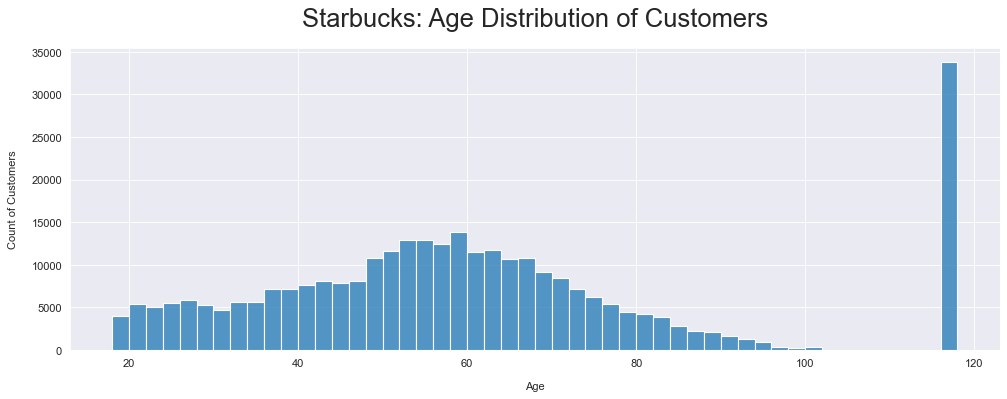

In [437]:
# Calling the function"fig_axes()"
fig_axes()

# Plotting the age distribution.
sns.histplot(data_plot_1, bins=50)

# Defining the title and the lables
plt.title('Starbucks: Age Distribution of Customers', fontsize=23, y=1.05)
plt.xlabel('Age', labelpad=12)
plt.ylabel('Count of Customers', labelpad=12)

# Saving the plot as a picture
plt.savefig('pics/plot_age_hist.png', dpi=300, bbox_inches = "tight");

**Conclusion:** 
1. **Range of age:** The youngest customers are *18* and the oldest customers are *118*.
2. **Median of age:** The median of the age distribution is *57*.
3. **Mean of age:** The mean of the age distribution is approximately *61*.
4. **Outliers:** The counts of customer ages of the value *118* are outliers and .


In [438]:
# Counting the amount of values and defining new data frame.
#data_pie = data.groupby('age').agg({'gender':'count'})
#data_pie.head()

In [435]:
# Defining the variable for the plot.
# Checking and counting the "age" values 

#x = profile['gender'].isnull().sum()
#data_pie = data.groupby('age').agg({'gender':'count'})
#data_pie['age_perc'] = (x/df_118.sum())*100
#data_pie['ages'] = data['age'] == 118
#data_pie['age_perc'] = (profile['gender'].isnull()/df_118_NaN)*100
#data_pie = data_pie['age_perc']
#data_pie['age_perc'].tail()
#data_pie['ages'].tail()
#print(df_118)
#print(x)

In [409]:
# Checking the ratio of the defined variable.
#data_pie.tail()

ValueError: x must be 1D

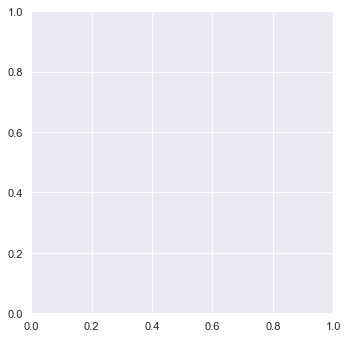

In [410]:
# Plotting the immediate booking possibility of apartments.
# Calling the function"fig_axes()"
fig_axes() # Python Function

# Defining the plot variables.
plot_labels = 'No', 'Yes'
plot_base_color = ['skyblue', 'cornflowerblue']
plot_explode = (0.1, 0)  # Exploding the 2 slices (gap)

# Defining the plot.
plt.pie(data_pie, explode=plot_explode, labels=plot_labels, autopct='%1.1f%%', shadow=True,
        startangle=90, colors=plot_base_color, textprops=dict(color="darkblue"))
plt.axis('equal')  # Ensuring that pie is drawn as a circle.

# Defining the title
plt.title('Will I Quickly Find a Suitable Apartment in Munich?', fontsize=18, y=1.03)

# Saving as a picture
plt.savefig('pics/plot_age_pie.png', dpi=300);

<a id='sec3'></a>
## 4. Section 3: Methodology
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<a id='sec3_1'></a>
### 4. A. Data Preprocessing
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>
  
#### Description of the steps taken to preprocess the data and address any abnormalities in the data sets. If data preprocessing is not needed, the reasons will be explained.<br>

Maschine Learning:
    
    * Tensor Flow
    * Keras

<a id='sec3_2'></a>
### 4. B. Implementation
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

    
#### Discussion about the process using the models, algorithms, and techniques applied to solve the problem. As well as mentioning of any complications during the implementation.

<a id='sec3_3'></a>
### 4. C. Refinement
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

#### Description of the process to refine the algorithms and techniques, such as using cross-validation or changing the parameter settings.

<a id='sec4'></a>
## 5. Section 4: Results
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<a id='sec4_1'></a>
### 5. A. Model Evaluation and Validation
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

    
#### Discussion about the models and parameters used in the methodology. 
    
# If no model is used, students can discuss the methodology using data visualizations and other means.

<a id='sec4_2'></a>
### 5. B. Justification
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

#### Discussion about the final results in detail and explaination why some models, parameters, or techniques perform better over others. 
    
# Show and compare the results in tabular forms or charts.

<a id='sec5'></a>
## 6. Section 5: Conclusion
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<a id='sec5_1'></a>
### 6. A. Reflection
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

#### Summary of the end-to-end problem solution and discussion of the particular aspects which are interesting or difficult to implement.

<a id='sec5_2'></a>
### 6. B. Improvement
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

#### Suggestions for the next research to improve the experiment.

<a id='sec6'></a>
## 7. References
<div style="text-align: right"><right><a href="#top">Table of Content</a></div>

<li><a href="https://unsplash.com/photos/NlGjqcPACUw">Data Source Picture 1</a> (Date Compiled: 11 August, 2022)</li>
<li><a href="https://unsplash.com/photos/dThk3tBIp4Q">Data Source Picture 2</a> (Date Compiled: 11 August, 2022)</li>